# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

import matplotlib.pyplot as plt
import cufflinks as cf 
cf.go_offline()
import plotly.express as px

from statsmodels.tsa.stattools import adfuller, kpss

import pmdarima as pm

from statsmodels.tools.eval_measures import rmse


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:

#sensor.info()
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [5]:
# Your code here:
print("number of rows: " + str(sensor.index.stop))
print("number of columns: " + str(len(sensor.columns)))

number of rows: 1751
number of columns: 12


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
# Your code here:
sensor["time_serie"] = pd.date_range(start="1/1/2018 00:00:00", end="1/1/2018 00:29:10", periods=sensor.index.stop)
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,time_serie
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04


Assign the time series index to the dataframe's index.

In [7]:
# Your code here:
sensor.set_index("time_serie", inplace=True)
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
time_serie,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [8]:
# Your code here:
sensor_plot1 = sensor.reset_index()
px.line(sensor_plot1, x= "time_serie", y="userAcceleration.x")

In [9]:
plt.rcParams["figure.figsize"]=(20,8)

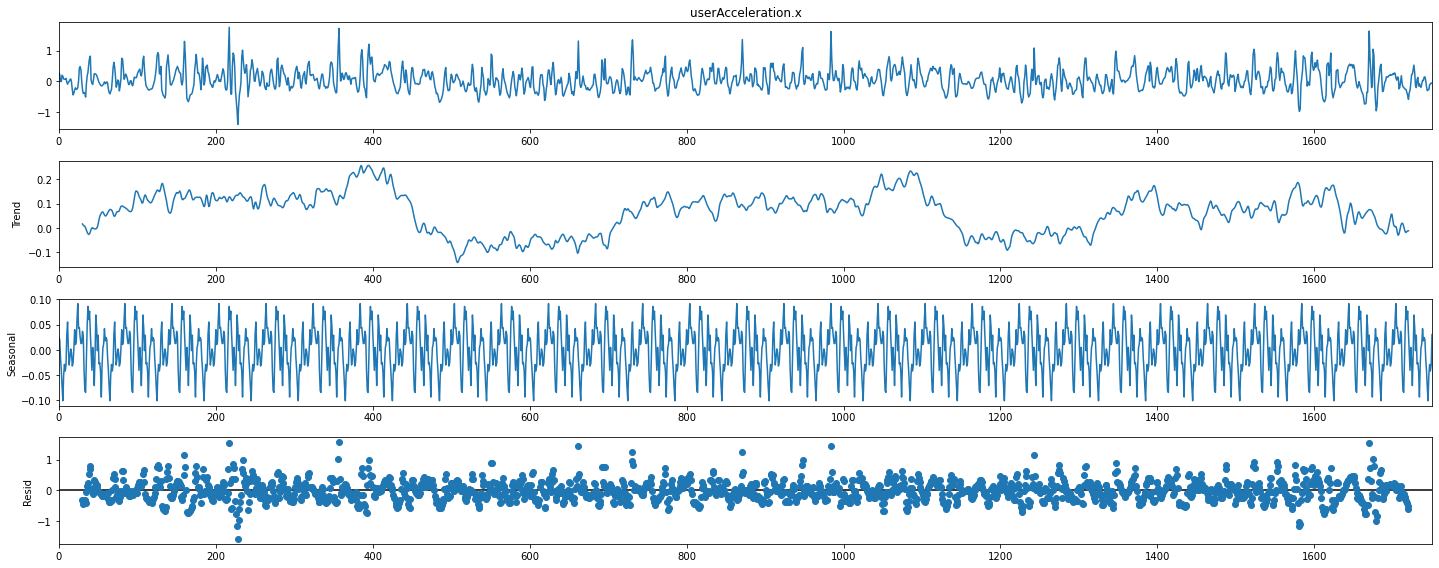

In [10]:
decomposed_userAcceleration_x = sm.tsa.seasonal_decompose(sensor_plot1["userAcceleration.x"], period = 60)
decomposed_userAcceleration_x.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

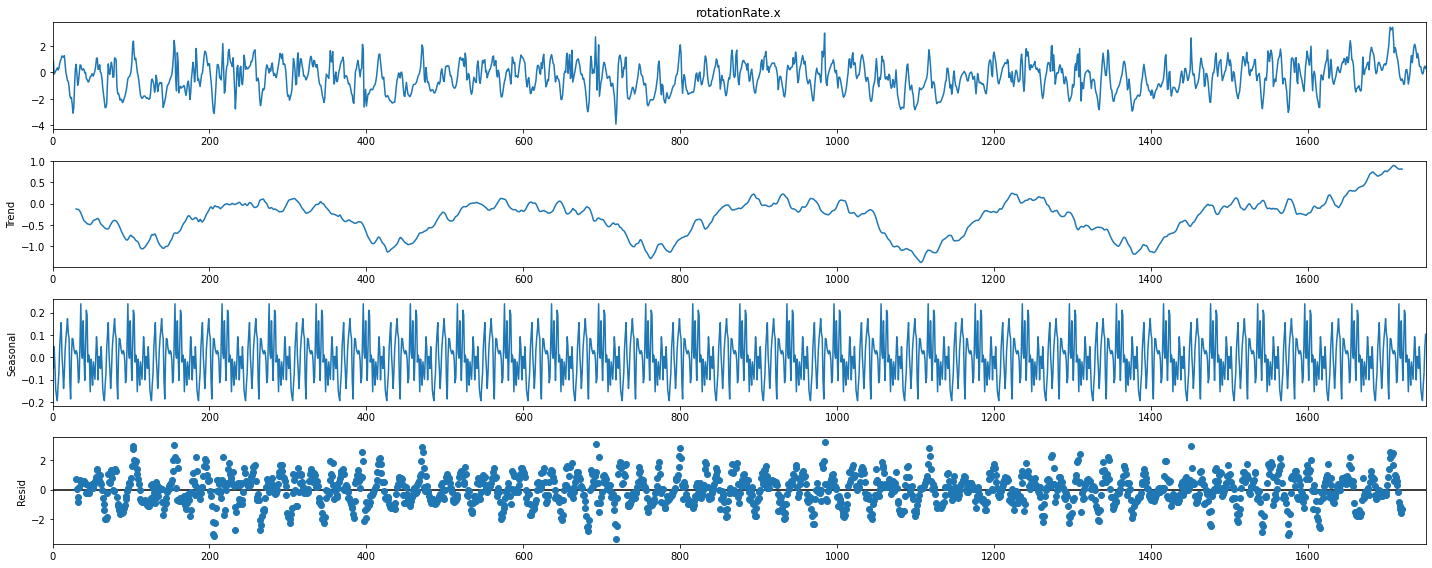

In [11]:
decomposed_rotationRate_x = sm.tsa.seasonal_decompose(sensor_plot1["rotationRate.x"], period = 60)
decomposed_rotationRate_x.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

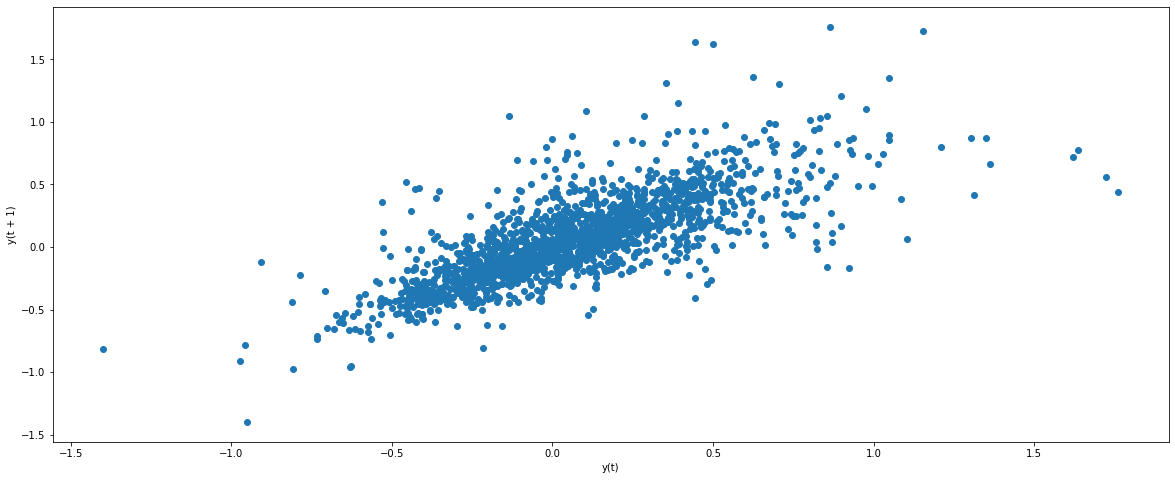

In [12]:
# Your code here:
pd.plotting.lag_plot(sensor_plot1["userAcceleration.x"], lag=1)

Create a lag plot for `rotationRate.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

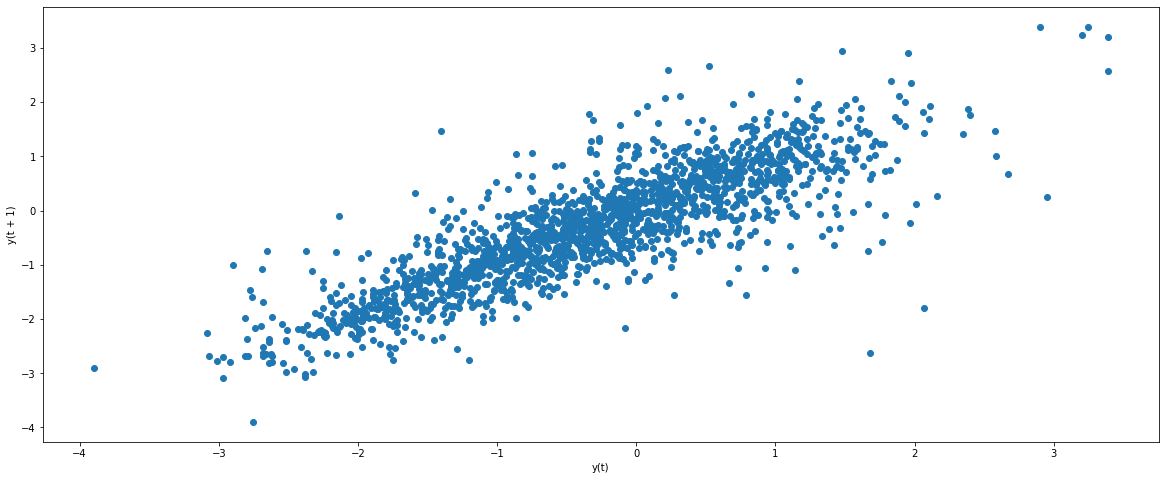

In [13]:
# Your code here:
pd.plotting.lag_plot(sensor_plot1["rotationRate.x"], lag=1)

What are your conclusions from both visualizations?

In [14]:
# Your conclusions here:
"Both sample lag plots exhibit a linear pattern. This shows that the data are strongly non-random and further suggests that an autoregressive model might be appropriate."


'Both sample lag plots exhibit a linear pattern. This shows that the data are strongly non-random and further suggests that an autoregressive model might be appropriate.'

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [15]:
# Your code here:
result_userAcceleration_x = adfuller(sensor_plot1["userAcceleration.x"], autolag="AIC")
print(f'ADF Statistic: {result_userAcceleration_x[0]}')
print(f'p-value: {result_userAcceleration_x[1]}')

ADF Statistic: -17.95799408616975
p-value: 2.823439483037483e-30


In [16]:
"""p-value is less than alfa, we reject the HO, so the serie is stationary, we don´t need to trasnform it to a stationary serie"""

'p-value is less than alfa, we reject the HO, so the serie is stationary, we don´t need to trasnform it to a stationary serie'

In [17]:
result_rotationRate_x = adfuller(sensor_plot1["rotationRate.x"], autolag="AIC")
print(f'ADF Statistic: {result_rotationRate_x[0]}')
print(f'p-value: {result_rotationRate_x[1]}')

ADF Statistic: -5.269860625086414
p-value: 6.3202303359123905e-06


In [18]:
"""p-value is less than alfa, we reject the HO, so the serie is stationary, we don´t need to trasnform it to a stationary serie"""

'p-value is less than alfa, we reject the HO, so the serie is stationary, we don´t need to trasnform it to a stationary serie'

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [19]:
model_training= sensor_plot1["userAcceleration.x"][0:len(sensor_plot1["userAcceleration.x"])-10]
model_training

0       0.294894
1       0.219405
2       0.010714
3      -0.008389
4       0.199441
          ...   
1736   -0.191617
1737   -0.081173
1738    0.033395
1739    0.028120
1740    0.140211
Name: userAcceleration.x, Length: 1741, dtype: float64

In [20]:
model_test = sensor_plot1["userAcceleration.x"][len(sensor_plot1["userAcceleration.x"])-10:len(sensor_plot1["userAcceleration.x"])]
model_test

1741    0.149749
1742    0.038461
1743   -0.169175
1744   -0.300361
1745   -0.270174
1746   -0.268367
1747   -0.102444
1748   -0.085590
1749   -0.048105
1750   -0.065011
Name: userAcceleration.x, dtype: float64

In [21]:
# Your code here:
model_arima = pm.auto_arima(sensor_plot1["userAcceleration.x"][0:len(sensor_plot1["userAcceleration.x"])-10])
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1741
Model:               SARIMAX(2, 0, 1)   Log Likelihood                 373.401
Date:                Sat, 19 Mar 2022   AIC                           -736.803
Time:                        18:56:00   BIC                           -709.492
Sample:                             0   HQIC                          -726.704
                               - 1741                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0249      0.007      3.818      0.000       0.012       0.038
ar.L1          0.9883      0.036     27.630      0.000       0.918       1.058
ar.L2         -0.3788      0.033    -11.637      0.000      -0.443      -0.315
ma.L1          0.1823      0.039      4.642      0.000       0.105       0.259
sigma2         0.0381      0.001     46.070      0.000       0.036       0.040
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1776.84
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.34
Prob(H) (two-sided):                  0.60   Kurtosis:                         7.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
model_predict = model_arima.predict(n_periods = 10) 
model_predict

array([0.17314162, 0.14288463, 0.10050861, 0.07009133, 0.05608313,
       0.05376144, 0.05677331, 0.06062929, 0.06329912, 0.06447696])

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [24]:
# Your code here:
rmse = rmse(model_test, model_predict)
rmse

0.22528523665494624